## Evaluación N°3_MANE - MCD - Análisis de datos en Python
### Cuestionario Calificado. • 30 min. • 10 puntos en total disponibles. 10 total de puntos
Desarrollo Cuestionario • Tomás Barrientos • 21-10-2023

### Instrucciones 
- Descargar el archivo de Excel llamado “Datos.xls”  ubicado en la sección de "Bienvenida" del curso
- Leer atentamente las preguntas
- Realizar cálculos, desarrollos y análisis en base al archivo
- Las respuestas que debes seleccionar están asociadas a los códigos o resultados que obtendrás del trabajo con el archivo


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

In [5]:
##Crear Dataframes de trabajo
GRD_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "GRD", header = 0, index_col = None)
Hosp_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Hospitales", header = 0, index_col = None)
Info_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Información Histórica", header = 0, index_col = None)

**Pregunta 1**

¿Cuál código permite hacer un gráfico de línea de las llegadas históricas del GRD4 en el hospital San Juan de Dios?  

In [5]:
Info_sheet.head()

,Número de llegada,Nombre Establecimiento,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5


<Axes: xlabel='Día de llegada'>

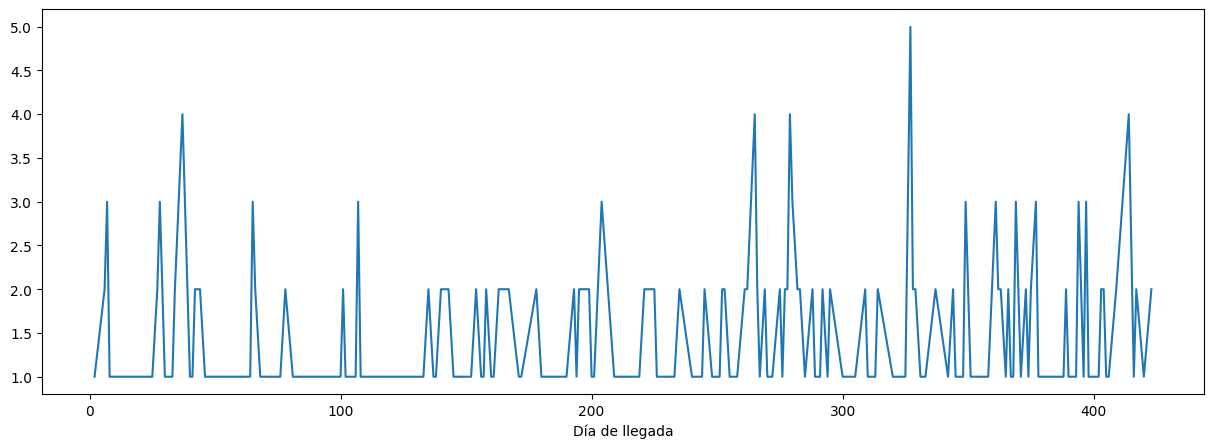

In [42]:

filtro1 = Info_sheet.loc[(Info_sheet["Nombre Establecimiento"] == "Hospital San Juan de Dios") & (Info_sheet["GRD"] == "GRD4")]
filtro2 = filtro1 [["Nombre Establecimiento", "Día de llegada"]].groupby("Día de llegada").count()
filtro2.plot(kind="line",legend=None,figsize=(15,5))

**Pregunta 2**

¿Cuál de las siguientes alternativas corresponde al código que permite construir un gráfico de línea con las llegadas históricas por día para el GRD4? (y entonces, agrupando cada día las llegadas a todos los hospitales )

<Axes: xlabel='Día de llegada'>

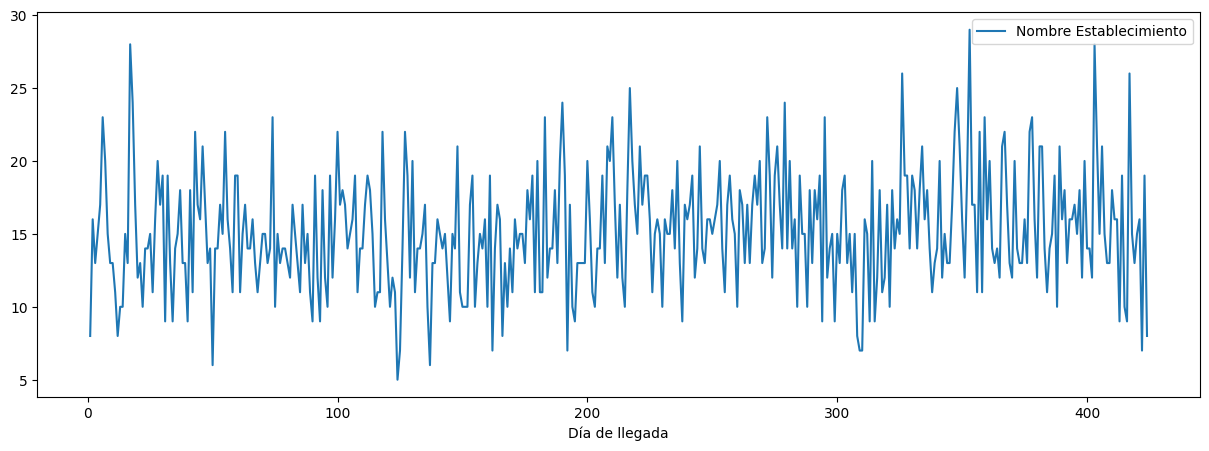

In [228]:
dfp2= Info_sheet.loc[Info_sheet["GRD"]=="GRD4"]
dfp2_filtro = dfp2[["Día de llegada","Nombre Establecimiento"]].groupby("Día de llegada").count()
dfp2_filtro.plot(kind="line",legend="Grafico",figsize=(15,5))


**Pregunta 3**

¿Qué código permite hacer un gráfico de línea para las llegadas históricas en toda la red?  

<Axes: xlabel='Nombre Establecimiento'>

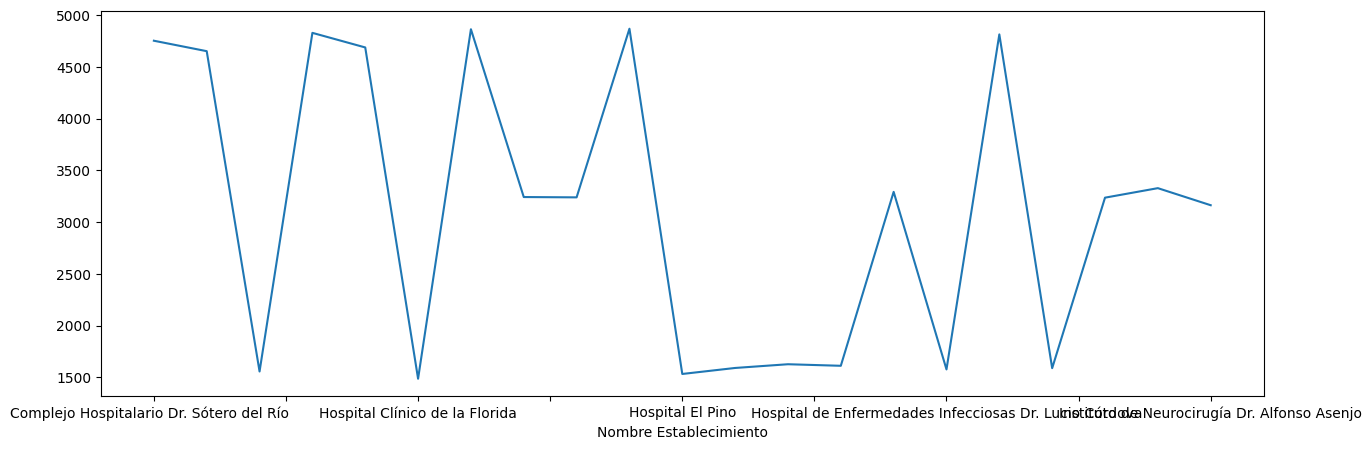

In [65]:
dfp3 = Info_sheet[["Día de llegada","Nombre Establecimiento"]].groupby("Nombre Establecimiento").count()
dfp3.plot(kind="line", legend= None, figsize=[15,5])

**Pregunta 4** 

¿Cuál código (es una parte) permite hacer un gráfico de línea para mostrar simultáneamente, llegadas históricas del GRD 3 y GRD4 para toda la red?  

C:\Users\Tomás Barrientos\AppData\Local\Temp\ipykernel_20596\115899112.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


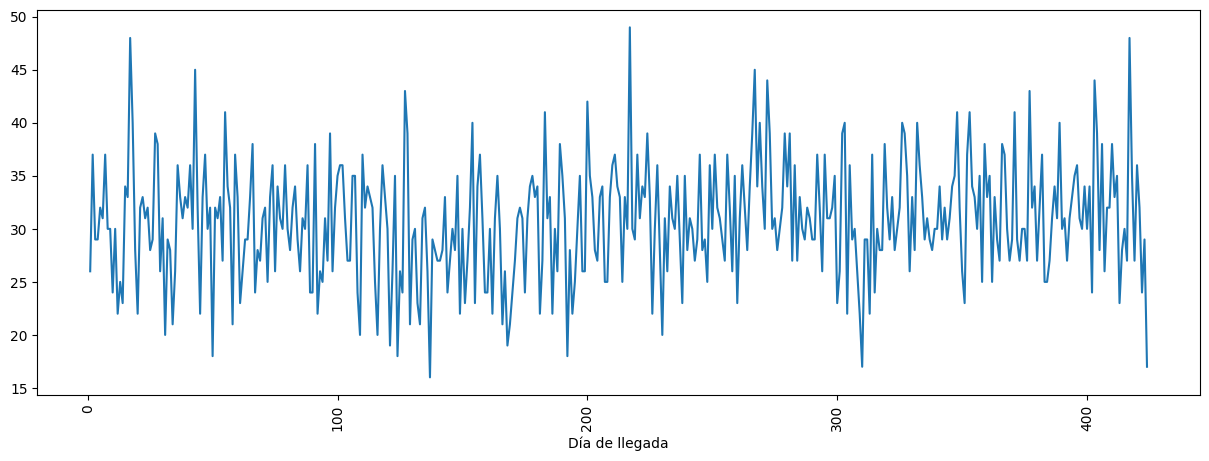

In [229]:
dfp4 = Info_sheet.loc[(Info_sheet['GRD']=='GRD3') | (Info_sheet['GRD']=='GRD4')]
dfp4 = dfp4[["Día de llegada","Nombre Establecimiento"]].groupby("Día de llegada").count()
ax = dfp4.plot(kind="line", legend=None, figsize=[15, 5])
# Rotar las etiquetas del eje Y en 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**Pregunta 5**

Al mirar un gráfico del tipo boxplot de la información sobre la cantidad de camas que se puede instalar en los hospitales de la red, ¿cuál de las siguientes alternativas describe mejor el valor de la mediana para estos datos?  

Máxima cantidad de camas a aumetar    8.0
dtype: float64


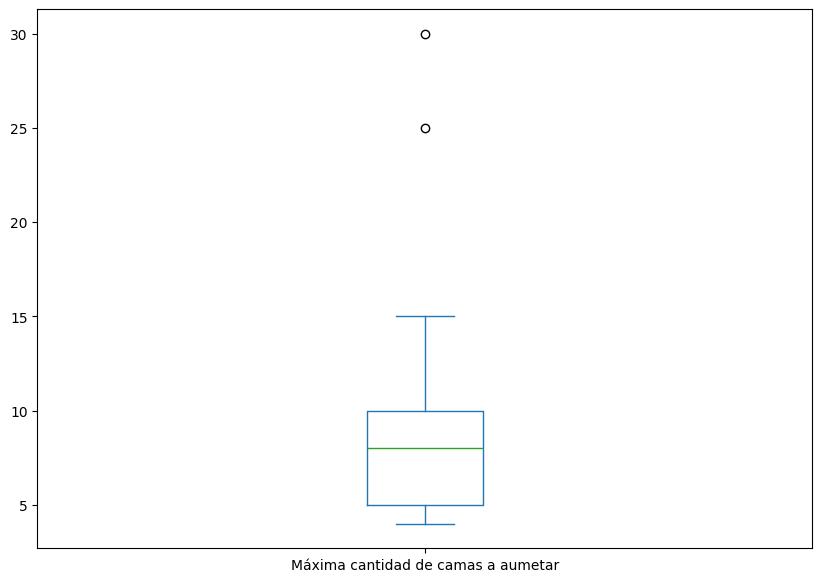

In [114]:
dfp4 = Hosp_sheet[["Máxima cantidad de camas a aumetar"]]
dfp4.plot(kind = "box", figsize = (10,7))
print(dfp4.median())

**Pregunta 6**

Al hacer una tabla de frecuencia sobre la cantidad total de camas críticas en los hospitales de la red, considerando intervalos de 3 en 3, ¿en cuántos intervalos hay exactamente 1 cama crítica?  

In [230]:
bins = pd.interval_range(

    	start=Hosp_sheet['Total Camas Críticas'].min(),

    	end=Hosp_sheet['Total Camas Críticas'].max()+3,

    	freq=3, 

    	closed="left"

   	 )

apoyo6 = Hosp_sheet[["Total Camas Críticas"]]

apoyo6 = apoyo6.apply(pd.Series.value_counts, sort=False, bins=bins)

apoyo6

,Total Camas Críticas
"[9, 12)",1
"[12, 15)",0
"[15, 18)",3
"[18, 21)",3
"[21, 24)",1
"[24, 27)",2
"[27, 30)",0
"[30, 33)",3
"[33, 36)",0
"[36, 39)",0


**Pregunta 7**

¿Cuál código permite realizar un gráfico de dispersión sobre el costo de resolución en el sistema de salud privado?  

<Axes: xlabel='ID GRD', ylabel='Costo resolución en Clínica Privada [MM$]'>

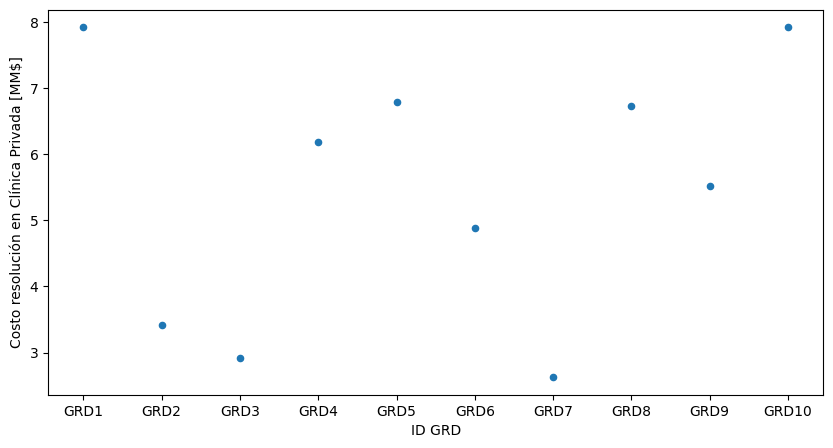

In [191]:
GRD_sheet.plot(kind = "scatter", x = "ID GRD", y = "Costo resolución en Clínica Privada [MM$]", figsize = (10,5))  

**Pregunta 8**

¿Cuál cifra indica el porcentaje máximo de pacientes por GRD que llegaron a la red los últimos 10 días registrados?  

<Axes: ylabel='Día de llegada'>

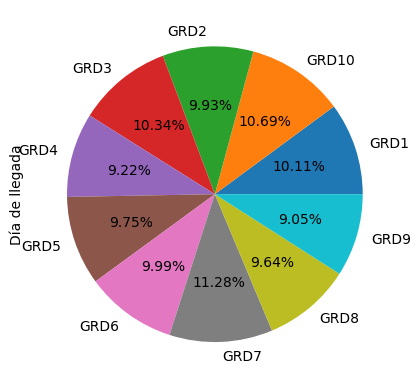

In [215]:
dfp8 = Info_sheet[Info_sheet['Día de llegada']>= 414].groupby("GRD").count()
dfp8["Día de llegada"].plot(kind="pie",autopct='%1.2f%%')

**Pregunta 9**

Considerando solamente el total de pacientes atendidos (llegada de pacientes) registrado en los últimos 10 días, ¿cuál de las siguientes alternativas corresponde al código para hacer un gráfico de barras que muestre la proporción (medida en porcentaje) de pacientes con cada GRD respecto del total de pacientes? 

<Axes: xlabel='GRD'>

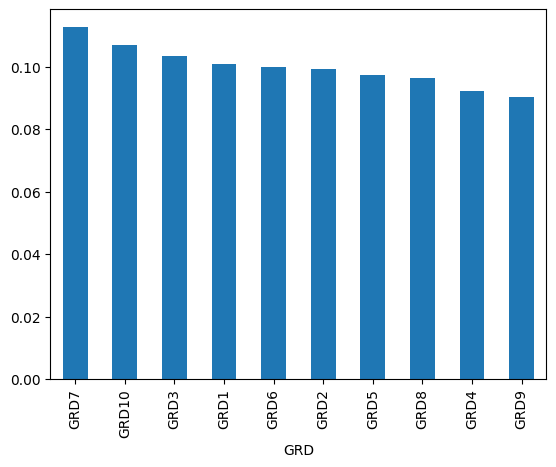

In [216]:
apoyo9 = Info_sheet.loc[Info_sheet["Día de llegada"] >= 414]

apoyo9["GRD"].value_counts(normalize = True, sort = True).plot(kind = 'bar')

**Pregunta 10**

¿Cuál es el servicio de salud con mayor costo anual de operación de camas, al realizar un gráfico de barras para obtener el resultado?  

<Axes: xlabel='Nombre Servicio de Salud'>

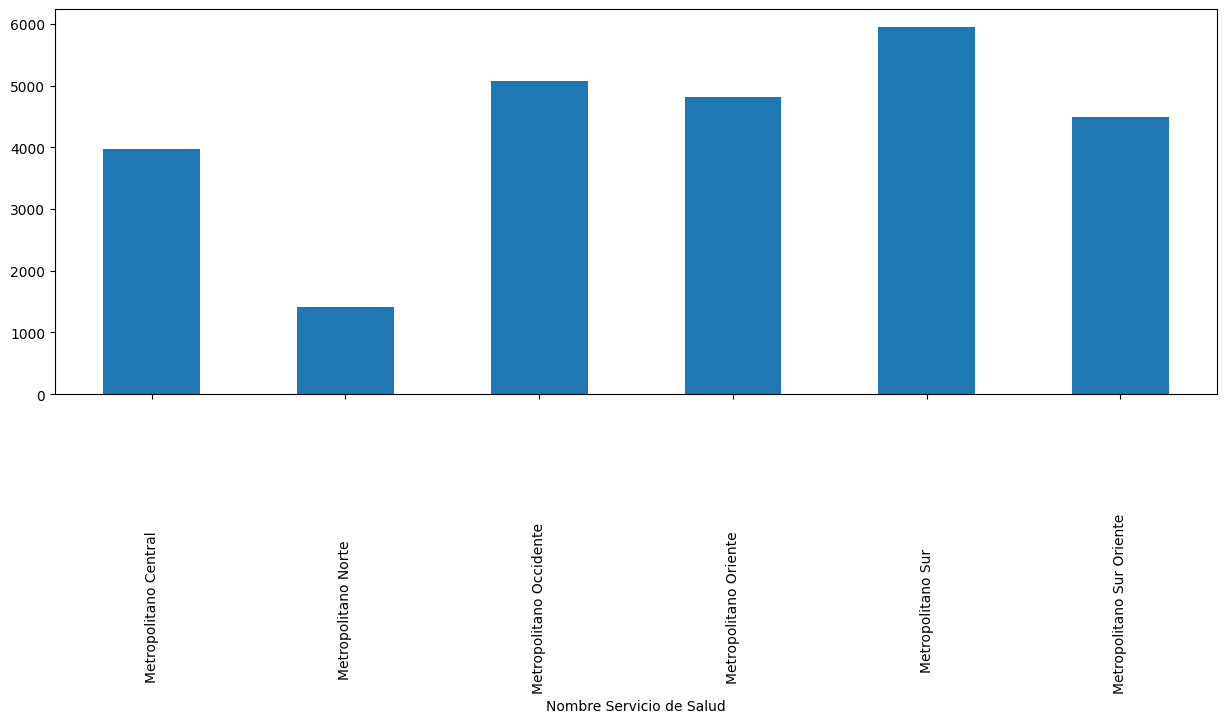

In [227]:
dfp10 = Hosp_sheet[["Costo de instalar una cama [MM$]","Nombre Servicio de Salud"]].groupby("Nombre Servicio de Salud").sum()
dfp10.plot(kind="bar", legend=None, figsize=[15,5])
